✅ Dataset loaded successfully!
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimete

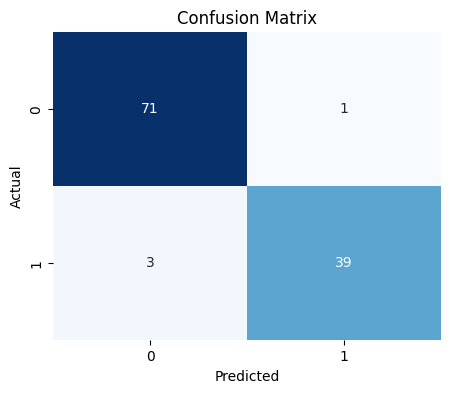

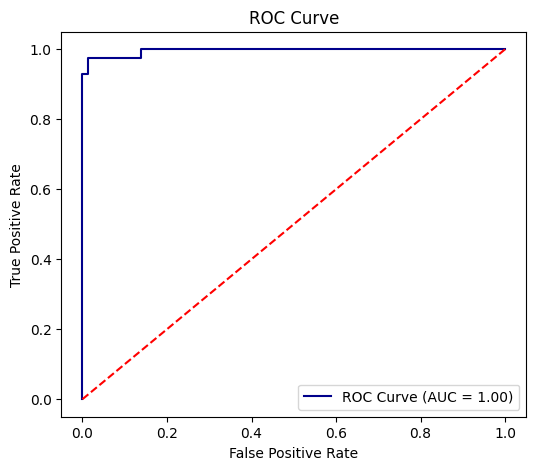

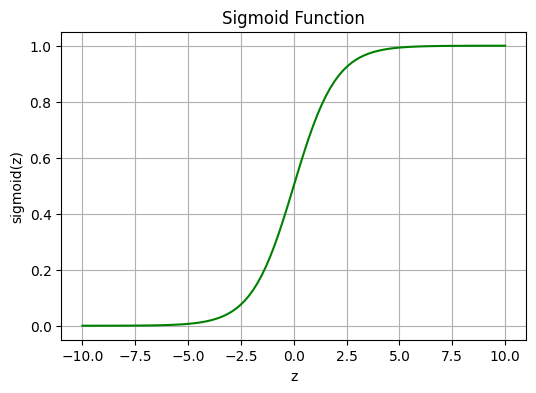

In [3]:
# ================================================
# 1. Import Libraries
# ================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score, roc_curve
)

# ================================================
# 2. Load Dataset
# ================================================
df = pd.read_csv("data.csv")

# View basic info
print("✅ Dataset loaded successfully!")
print(df.head())
print(df.info())

# ================================================
# 3. Drop unnecessary columns (like ID or unnamed)
# ================================================
df.drop(columns=['id'], inplace=True, errors='ignore')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # remove unnamed columns if any

# ================================================
# 4. Encode Target Column (M=1, B=0)
# ================================================
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# ================================================
# 5. Check and Handle Missing Values
# ================================================
print("\nMissing values in each column:")
print(df.isnull().sum())

# Fill missing values with mean
df = df.fillna(df.mean())

# ================================================
# 6. Split Features & Target
# ================================================
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# ================================================
# 7. Train-Test Split
# ================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ================================================
# 8. Standardize Features
# ================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ================================================
# 9. Train Logistic Regression Model
# ================================================
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)

# ================================================
# 10. Predictions
# ================================================
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# ================================================
# 11. Evaluation Metrics
# ================================================
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("\n✅ Model Evaluation Results:")
print("Confusion Matrix:\n", cm)
print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")

# ================================================
# 12. Plot Confusion Matrix
# ================================================
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ================================================
# 13. ROC Curve
# ================================================
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkblue')
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# ================================================
# 14. Sigmoid Function Explanation
# ================================================
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
plt.figure(figsize=(6,4))
plt.plot(z, sigmoid(z), color='green')
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid(True)
plt.show()
